In [1]:
 %matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

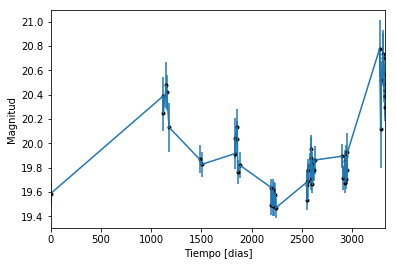

In [2]:
data = np.genfromtxt('LC_18344_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

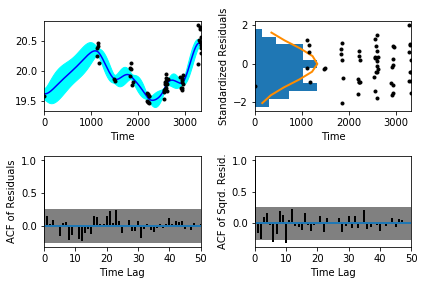

In [5]:
sample.assess_fit()

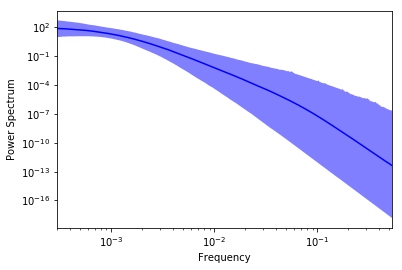

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000375271,1.41263,'Medida del nivel de ruido')

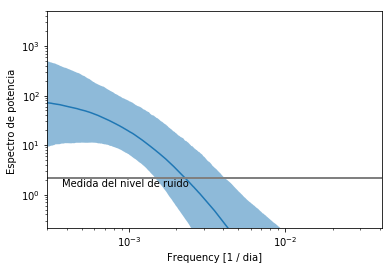

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

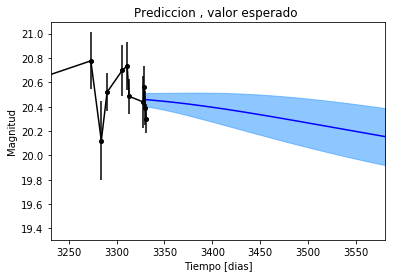

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

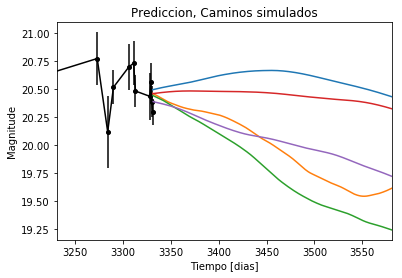

In [10]:
predict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')


/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


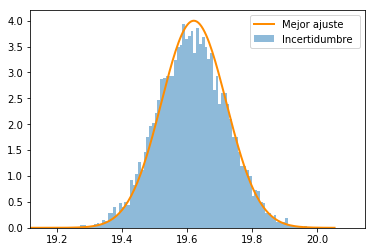

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

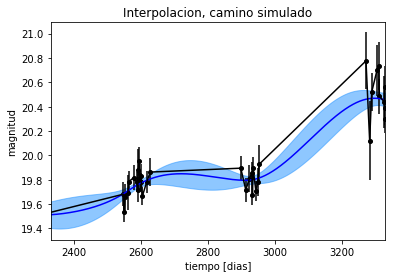

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

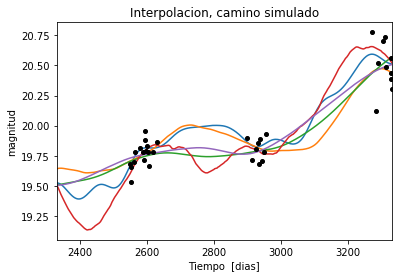

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

Plotting parameter summary


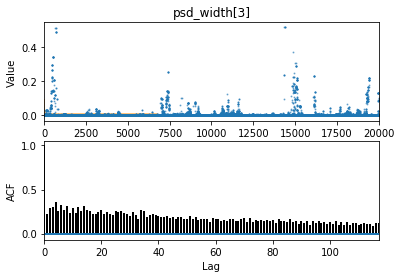

In [15]:
sample.plot_parameter('psd_width', 3, doShow=True)

In [16]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [17]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 248.398916349
Median: 0.00721409961051
Standard deviation: 0.195021211048
68% credibility interval: [ 0.00068528  0.15166889]
95% credibility interval: [  3.45817786e-04   7.93532670e-01]
99% credibility interval: [  3.08689635e-04   9.91840251e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1642.13697074
Median: 0.00117038369146
Standard deviation: 0.0537386364873
68% credibility interval: [ 0.00043612  0.01043511]
95% credibility interval: [ 0.00031869  0.1072678 ]
99% credibility interval: [  3.05738457e-04   3.69529722e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 376.688126386
Median: 0.00864580690301
Standar

In [18]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 402.637510529
Median: 0.00077319802364
Standard deviation: 0.207810188605
68% credibility interval: [ 0.          0.15264209]
95% credibility interval: [ 0.          0.84019017]
99% credibility interval: [ 0.          1.00023367]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 402.637510529
Median: 0.00077319802364
Standard deviation: 0.207810188605
68% credibility interval: [ 0.          0.15264209]
95% credibility interval: [ 0.          0.84019017]
99% credibility interval: [ 0.          1.00023367]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2265.19375291
Median: 0.0
Standard deviation: 0.000402355114246
68% 

Plotting parameter summary


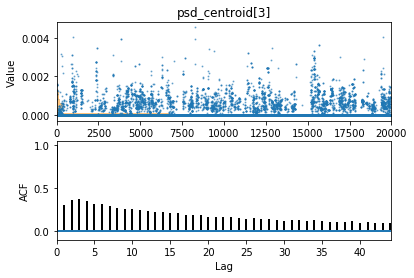

In [20]:
sample.plot_parameter('psd_centroid', 3, doShow=True)

In [21]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [22]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 817.153312338
Median: 54.439426722
Standard deviation: 1.58575810983
68% credibility interval: [ 52.63462557  55.5925109 ]
95% credibility interval: [ 50.27040254  56.32326972]
99% credibility interval: [ 48.23492588  56.89407129]


In [23]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [24]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1137.11459198
Median: 0.497132752873
Standard deviation: 1.98731727972
68% credibility interval: [ 0.04193511  3.45423789]
95% credibility interval: [ 0.01319331  6.59612187]
99% credibility interval: [ 0.00981988  9.25556483]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 719.255822235
Median: 0.156123059884
Standard deviation: 7.17872347846
68% credibility interval: [ 0.00615934  3.3351018 ]
95% credibility interval: [  4.39002593e-0

Plotting parameter summary


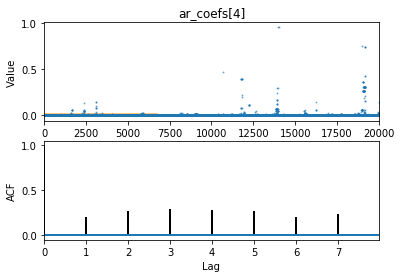

In [25]:
sample.plot_parameter('ar_coefs', 4, doShow=True)

In [26]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [27]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [28]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2920.15349503
Median: 19.9198829344
Standard deviation: 0.211263954638
68% credibility interval: [ 19.76212849  20.09306067]
95% credibility interval: [ 19.4955375   20.35956479]
99% credibility interval: [ 19.21878604  20.65072124]


Plotting parameter summary


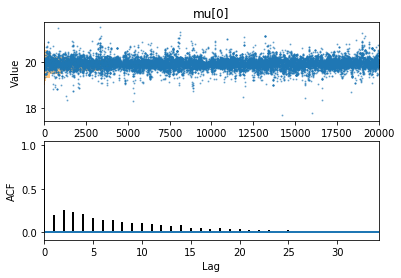

In [29]:
sample.plot_parameter('mu', 0, doShow=True)

In [30]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

Plotting parameter summary


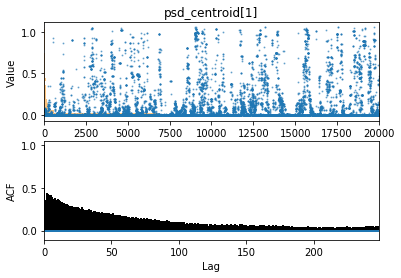

In [31]:
sample.plot_parameter('psd_centroid', 1, doShow=True)

In [32]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [33]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 817.153312338
Median: 54.439426722
Standard deviation: 1.58575810983
68% credibility interval: [ 52.63462557  55.5925109 ]
95% credibility interval: [ 50.27040254  56.32326972]
99% credibility interval: [ 48.23492588  56.89407129]


Plotting parameter summary


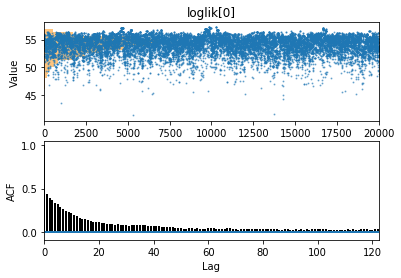

In [34]:
sample.plot_parameter('loglik', 0, doShow=True)

In [35]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [36]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1711.72163674
Median: 0.14180534825
Standard deviation: 0.20698788565
68% credibility interval: [ 0.08009677  0.3033854 ]
95% credibility interval: [ 0.05054663  0.70657443]
99% credibility interval: [ 0.03835668  1.23569952]


Plotting parameter summary


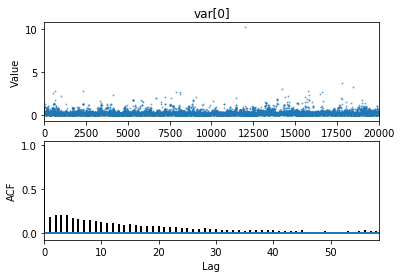

In [37]:
sample.plot_parameter('var', 0, doShow=True)

In [38]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [39]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2726.15670839
Median: 0.928673738472
Standard deviation: 0.138443827964
68% credibility interval: [ 0.80499317  1.07600467]
95% credibility interval: [ 0.70000961  1.24570931]
99% credibility interval: [ 0.64164379  1.36483389]


Plotting parameter summary


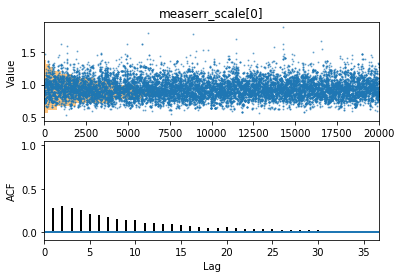

In [40]:
sample.plot_parameter('measerr_scale', 0, doShow=True)

In [41]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [42]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 13664.3002807
Median: 6.0208686662e-05
Standard deviation: 0.183441152404
68% credibility interval: [  1.02027543e-06   1.72251808e-03]
95% credibility interval: [  3.66160274e-43   2.98906016e-02]
99% credibility interval: [  1.49022525e-58   7.40950278e-01]


Plotting parameter summary


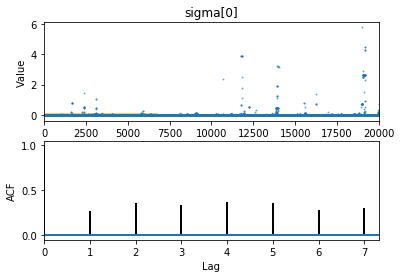

In [43]:
sample.plot_parameter('sigma', 0, doShow=True)

In [44]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [45]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 248.398916349
Median: (-0.0453275246773-1.78514333887j)
Standard deviation: 1.79063447687
68% credibility interval: [-0.95296374+0.j         -0.00430574-0.00744582j]
95% credibility interval: [ -4.98591281e+00+0.j          -2.17283723e-03-0.99952231j]
99% credibility interval: [ -6.23191609e+00+0.j          -1.93955418e-03-0.00495337j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1642.13697074
Median: (-0.00735373761392+0j)
Standard deviation: 1.34866074308
68% credibility interval: [-0.06556572+0.j         -0.00274025+0.38001769j]
95% credibility interval: [-0.67398346+0.16940014j -0.00200241+0.00684572j]
99% credibility interval: [ -2.32182372e+00+1.65146646j  -1.92101138e-03+0.j        ]
Posterior summary for par